# Creating and Training a Simple Machine Learning Model #
> "AP Scores Decision Tree for Classification"

- toc:true
- branch: master
- badges: true
- comments: true
- categories: [jupyter]

# Training and Testing ML Model #

Before starting anything else, we need to import libraries that we will use for training our model. The pandas library and sklearn libraries are important and are used for the actual training of the model. The matplot library is used for visualizing our model and determining how successful it is. 

In [2]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree
import matplotlib.pyplot as plt

We need to import the file that contains our training data. In this case, it is in the same directory as the Jupyter notebook and is called apscores.csv

In [3]:
# Load the CSV file using pandas
data = pd.read_csv('apscores.csv')

The csv file is formatted as such: 

| UserID | FRQ1  | FRQ2  | FRQ3  | APScore |
|--------|-------|-------|-------|---------|
| 01     | Score | Score | Score | Score   |
| 02     | Score | Score | Score | Score   |
| 03     | Score | Score | Score | Score   |

Thus, below we are setting the FRQ scores on the X and the AP Score on the y since we want to predict what AP Score someone will get based on their FRQ score. 

In [4]:
# Select the attributes and the ap scorees to classify
X = data.iloc[:, 1:4]  # 2nd to 4th columns are the scores on different FRQs
y = data.iloc[:, 4]    # 5th column as ap scores to classify

This splits up the data into training and testing data. Setting the test size equal to 0.2 means that the data is split into both training data and testing data. 80% of the data is used for training the model and the remaining 20% is used to test the accuracy of the model. The random_state variable is randomly chosen and doesn't matter what the number is.

In [5]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Now, we are using the DecisionTreeClassifier with sklearn and training the classifier with the training data that was assigned above. 

In [6]:
# Create a decision tree classifier
clf = DecisionTreeClassifier()
# Train the classifier
clf.fit(X_train, y_train)

DecisionTreeClassifier()

After the model has been trained, we can stop there and have a functioning model. However, it is important to test the accuracy of the model. We use the data from the remaining 20% and classify it with the decision tree created above. The accuracy is 95% so we don't have to make many adjustments, if any. 

In [7]:
# Make predictions on the test set for ap scores
y_pred = clf.predict(X_test)
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.95


Now, we are creating a function to predict the score using the created model. The function returns the predicted score from the function. 

In [8]:
# Function to predict the score/class based on input values
def predict_score(attribute1, attribute2, attribute3):
    # Create a DataFrame with the input values
    input_data = pd.DataFrame([[attribute1, attribute2, attribute3]])

    # Use the trained classifier to make predictions on the input data
    prediction = clf.predict(input_data)

    return prediction[0]

Finally, we are using the predict_score function to test what score someone will get based on their 3 FRQ scores. This function was incorporated into our website later. 

In [9]:
# Test case 
attribute1 = 1
attribute2 = 1
attribute3 = 1

predicted_score = predict_score(attribute1, attribute2, attribute3)
print("Predicted Score:", predicted_score)

Predicted Score: 1


In [10]:
# Test case 
attribute1 = 9
attribute2 = 7
attribute3 = 9

predicted_score = predict_score(attribute1, attribute2, attribute3)
print("Predicted Score:", predicted_score)

Predicted Score: 5


Finally, we are plotting the model on an accuracy plot to see whether or not specific test cases were accurately classified. We can see which test cases were inaccurate. In this situation, our model predicted that someone would get an AP score of 5, when they actually got an AP score of 5 in the training data given. 

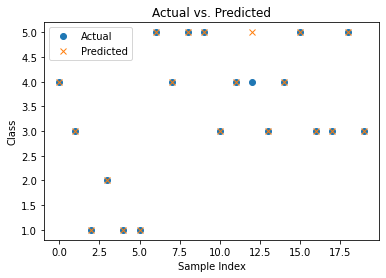

In [11]:
# Plot the accuracy
plt.plot(range(len(y_test)), y_test, 'o', label='Actual')
plt.plot(range(len(y_pred)), y_pred, 'x', label='Predicted')
plt.xlabel('Sample Index')
plt.ylabel('Class')
plt.title('Actual vs. Predicted')
plt.legend()
plt.show()